In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,GlobalAveragePooling2D
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report


In [27]:
# Define the paths to your image and csv folders
train_val_dir = "/content/train_val"
test_dir = "/content/test"
train_path_labels = "/content/train_val.csv"
train_val_labels = pd.read_csv(train_path_labels)


In [28]:
# load training dataset in numpy array
images = []
labels = []
for filename in os.listdir(train_val_dir):
   if filename.endswith('.png'):
 # Load the images and resize them to (128, 128) with 3 color channels
     img = cv2.imread(os.path.join(train_val_dir, filename))
     img = cv2.resize(img, (128, 128))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = Image.open(os.path.join(train_val_dir, filename))
     img_array = np.array(img)
 # Append the array to the list of images
     images.append(img_array)
     labels.append(filename)

# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')


In [29]:
x_train.shape

(1000, 128, 128, 3)

In [33]:
x_train[:5]
y_train[:5]

array([522, 536, 573, 679, 670])

In [34]:
# load test dataset in numpy array
images = []
labels = []
for filename in os.listdir(test_dir):
 if filename.endswith('.png'):
 # Load the images and resize them to (128, 128) with 3 color channels
  img = cv2.imread(os.path.join(test_dir, filename))
  img = cv2.resize(img, (128, 128))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# img = Image.open(os.path.join(test_dir, filename))
 img_array = np.array(img)
 # Append the array to the list of images
 images.append(img_array)
 labels.append(filename)
# Convert the string labels to numerical labels
le = LabelEncoder()
labels = le.fit_transform(labels)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_test.npy', images)
np.save('y_test.npy', labels)
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy') 

In [35]:
x_test.shape


(50, 128, 128, 3)

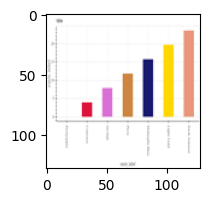

In [36]:
# check the images loaded
plt.figure(figsize = (10,2))
plt.imshow(x_train[10])
plt.imshow(x_train[208])
plt.imshow(x_train[444])

In [37]:
# define some classes from the images we have observed
image_classes = ['line', 'dot_line', 'hbar_categorical', 'vbar_categorical', 'pie']
image_classes[0]
# map the categories to the labels array i.e y_train
label_map = {'line': 0, 'dot_line': 1, 'hbar_categorical': 2, 'vbar_categorical': 3, 'pie': 4}
y_train = np.array([label_map[label] for label in train_val_labels['type']])
y_train
y_train.shape
y_test.shape


(50,)

In [38]:
# we need to map the lables from csv to the images somehow
# function to test the chart sample
def image_sample(x, y, index):
 plt.figure(figsize = (10,2))
 plt.imshow(x[index])
# image_label = train_val_labels.iloc[index]['type']
# plt.xlabel(image_label)
 plt.xlabel(image_classes[y[index]])

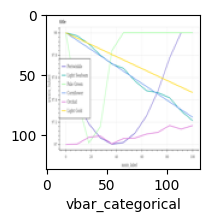

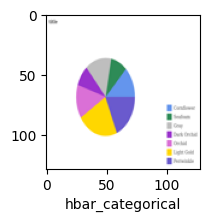

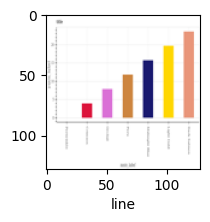

In [39]:
image_sample(x_train,y_train,0)
image_sample(x_train,y_train,208)
image_sample(x_train,y_train,444)

In [40]:
# now we have mapped the corresponding labels to the image
# normalize the image
# x_train[0]/255
x_train=x_train /255
x_test=x_train /255
x_test.shape


(1000, 128, 128, 3)

In [41]:
# take the label for train data from csv file
y_train_index = train_val_labels['image_index']
y_train_type = train_val_labels['type']
y_train_type[:5]


0    vbar_categorical
1    vbar_categorical
2    vbar_categorical
3    vbar_categorical
4    vbar_categorical
Name: type, dtype: object

In [42]:
# writing a simple nn to test first
# Define the model architecture
model = Sequential([
 Flatten(input_shape=(128,128,3)),
 Dense(3000, activation='relu'),
 Dense(1000, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
32/32 [==============================] - 50s 1s/step - loss: 7.7646 - accuracy: 0.2110
Epoch 2/10
32/32 [==============================] - 39s 1s/step - loss: 1.6253 - accuracy: 0.1920
Epoch 3/10
32/32 [==============================] - 41s 1s/step - loss: 1.6159 - accuracy: 0.1780
Epoch 4/10
32/32 [==============================] - 45s 1s/step - loss: 1.6158 - accuracy: 0.1910
Epoch 5/10
32/32 [==============================] - 49s 1s/step - loss: 1.6207 - accuracy: 0.1950
Epoch 6/10
32/32 [==============================] - 42s 1s/step - loss: 1.6134 - accuracy: 0.2070
Epoch 7/10
32/32 [==============================] - 38s 1s/step - loss: 1.6107 - accuracy: 0.2060
Epoch 8/10
32/32 [==============================] - 37s 1s/step - loss: 1.6098 - accuracy: 0.2070
Epoch 9/10
32/32 [==============================] - 38s 1s/step - loss: 1.6118 - accuracy: 0.2020
Epoch 10/10
32/32 [==============================] - 34s 1s/step - loss: 1.6095 - accuracy: 0.2050


In [43]:
# Split the training images and labels into training and validation sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

model.evaluate(x_test,y_test)

7/7 [==============================] - 3s 424ms/step - loss: 1.6106 - accuracy: 0.1850


[1.6105657815933228, 0.1850000023841858]

In [44]:
y_pred = model.predict(x_test)
y_pred
y_pred_classes = [np.argmax(ele) for ele in y_pred]
# print("classificaton report : \n",classification_report(y_test,y_pred_classes))

7/7 [==============================] - 3s 375ms/step


In [45]:
# here we see the accuracy is very low and we need to modify our nn to add more layers for better accuracy
# Print the shapes of the arrays to verify that they loaded correctly
print("Train Images Shape:", x_train.shape)
print("Train Labels Shape:", y_train.shape)
print("Test Images Shape:", x_test.shape)
print("Test Labels Shape:", y_test.shape)

Train Images Shape: (800, 128, 128, 3)
Train Labels Shape: (800,)
Test Images Shape: (200, 128, 128, 3)
Test Labels Shape: (200,)


Epoch 1/50
1/1 [==============================] - 21s 21s/step - loss: 1.6166 - accuracy: 0.2000 - val_loss: 2.5288 - val_accuracy: 0.1650
Epoch 2/50
1/1 [==============================] - 15s 15s/step - loss: 2.3688 - accuracy: 0.2087 - val_loss: 1.8778 - val_accuracy: 0.2400
Epoch 3/50
1/1 [==============================] - 16s 16s/step - loss: 1.9265 - accuracy: 0.1900 - val_loss: 1.6248 - val_accuracy: 0.1850
Epoch 4/50
1/1 [==============================] - 16s 16s/step - loss: 1.6349 - accuracy: 0.2138 - val_loss: 1.6223 - val_accuracy: 0.2200
Epoch 5/50
1/1 [==============================] - 14s 14s/step - loss: 1.6112 - accuracy: 0.1950 - val_loss: 1.6273 - val_accuracy: 0.1900
Epoch 6/50
1/1 [==============================] - 15s 15s/step - loss: 1.6082 - accuracy: 0.2387 - val_loss: 1.6266 - val_accuracy: 0.1650
Epoch 7/50
1/1 [==============================] - 15s 15s/step - loss: 1.6041 - accuracy: 0.2125 - val_loss: 1.6198 - val_accuracy: 0.1650
Epoch 8/50
1/1 [===========

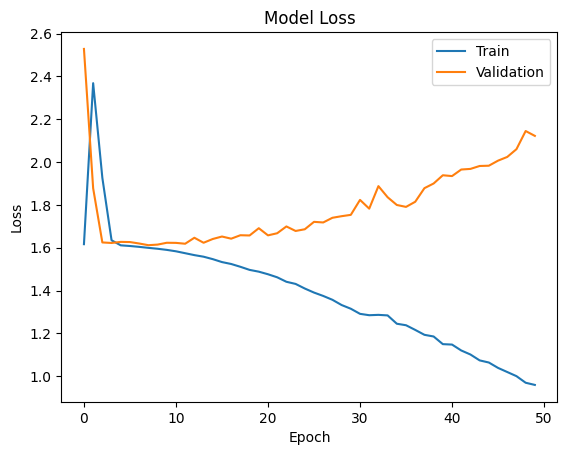

In [46]:
# modify the model architecture to cmnn
cnn_model = Sequential([
 Conv2D(filters=16 ,kernel_size=(3,3), activation='relu', input_shape=(128,128,3)),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(32, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Conv2D(64, (3,3), activation='relu'),
 MaxPooling2D(pool_size=(2,2)),
 Flatten(),
 Dense(128, activation='relu'),
 Dense(5, activation='softmax')
])
# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = cnn_model.fit(x_train, y_train, batch_size=1000, epochs=50,validation_data=(x_test, y_test))
# Plot the obtained loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [47]:
cnn_model.evaluate(x_test,y_test)

7/7 [==============================] - 1s 124ms/step - loss: 2.1225 - accuracy: 0.2500


[2.1225175857543945, 0.25]

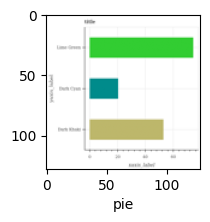

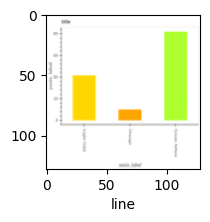

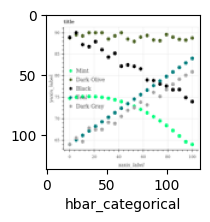

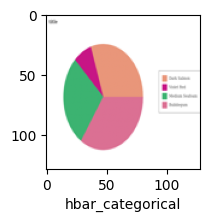

In [48]:
image_sample(x_test,y_test,1)
image_sample(x_test,y_test,50)
image_sample(x_test,y_test,25)
image_sample(x_test,y_test,30)

In [49]:
# Observation: we can see some wrong predictions
y_pred = cnn_model.predict(x_test)
y_pred[:5]

7/7 [==============================] - 1s 125ms/step


array([[0.29176813, 0.05170498, 0.5570257 , 0.09270217, 0.00679904],
       [0.12336452, 0.20420046, 0.11214608, 0.07543809, 0.48485082],
       [0.0707698 , 0.19549361, 0.16115938, 0.44893634, 0.12364084],
       [0.14413267, 0.14532954, 0.6001641 , 0.01916085, 0.09121286],
       [0.08429421, 0.28181314, 0.36233744, 0.02998013, 0.24157502]],
      dtype=float32)

In [50]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

y_test[:5]
# here we see some values are not matching


array([0, 4, 4, 4, 0])

'vbar_categorical'

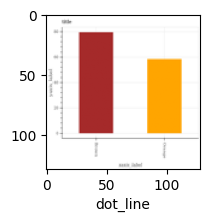

In [51]:
# test actual and predicted
# image_sample(x_test,y_test,1) #actual
# image_classes[y_classes[1]] #predicted
# image_sample(x_test,y_test,10) #actual
# image_classes[y_classes[10]] #predicted
image_sample(x_test,y_test,15) #actual
image_classes[y_classes[15]] #predicted


In [52]:
# some values are not matching
print("classification report: \n", classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.33      0.19      0.24        37
           1       0.30      0.25      0.27        44
           2       0.26      0.25      0.26        48
           3       0.21      0.27      0.24        33
           4       0.21      0.29      0.24        38

    accuracy                           0.25       200
   macro avg       0.26      0.25      0.25       200
weighted avg       0.26      0.25      0.25       200



In [53]:
# Generate the confusion matrix
conf_mat = confusion_matrix(y_test, y_classes)
print('Confusion Matrix:')
print(conf_mat)

Confusion Matrix:
[[ 7  5 10  8  7]
 [ 6 11  7  8 12]
 [ 2  5 12 13 16]
 [ 2  6  9  9  7]
 [ 4 10  8  5 11]]


Text(95.72222222222221, 0.5, 'Actual')

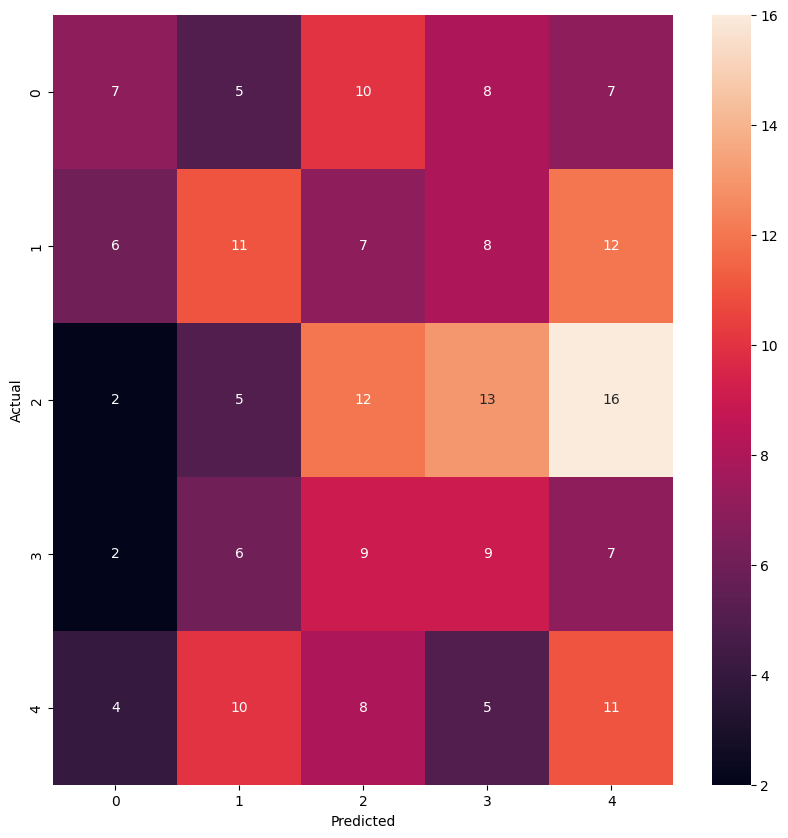

In [54]:
# Plot the confusion matrix
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [55]:
# for 50 iterations, we can see some promising accuracy, more training will be required for better accuracy
# in the confusion matrix, whatever is not in diagonal is a error

from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Load the pre-trained model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


# Replace the final classification layer with a new layer
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(5, activation='softmax')(x)
pt_model = tf.keras.Model(inputs=vgg16_model.input, outputs=predictions)


# Freeze the weights of all layers except the new classification layer
for layer in pt_model.layers:
 layer.trainable = False


# Compile the model with categorical crossentropy loss and Adam optimizer
pt_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Print the summary of the model architecture
pt_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [56]:
# Set up data generators for image augmentation and feeding data to the model
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)


# flow method generates batches of augmented data
train_generator = train_datagen.flow(x_train, y_train, batch_size=32)
test_generator = train_datagen.flow(x_test, y_test, batch_size=32)


# Train the model with early stopping
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
history = pt_model.fit(train_generator, epochs=100, validation_data=test_generator, callbacks=[es])

Epoch 1/100


ValueError: ignored